In [ ]:
#Dataset
#energydata_complete
#Tetuan City power consumption

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir(r"/content/drive/My Drive")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving grocery_dataset.csv to grocery_dataset.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


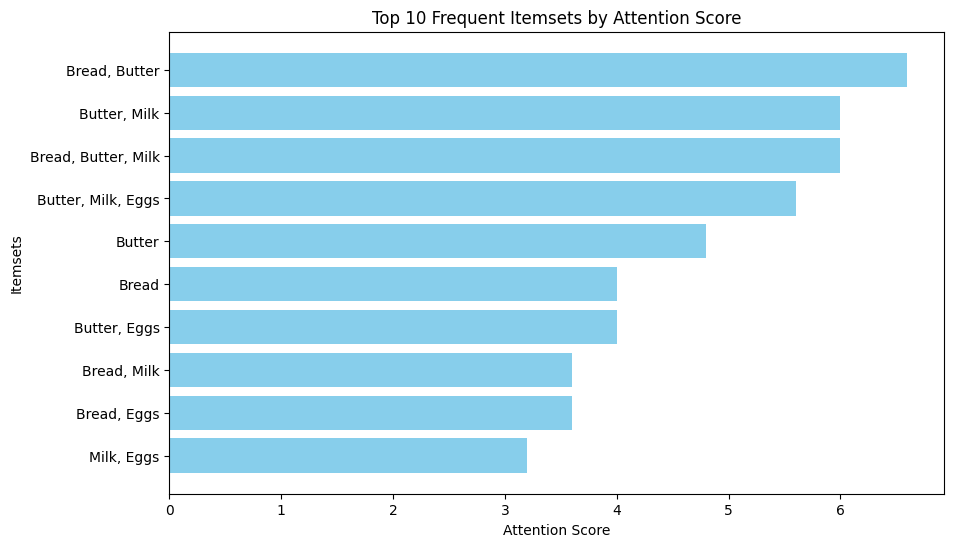

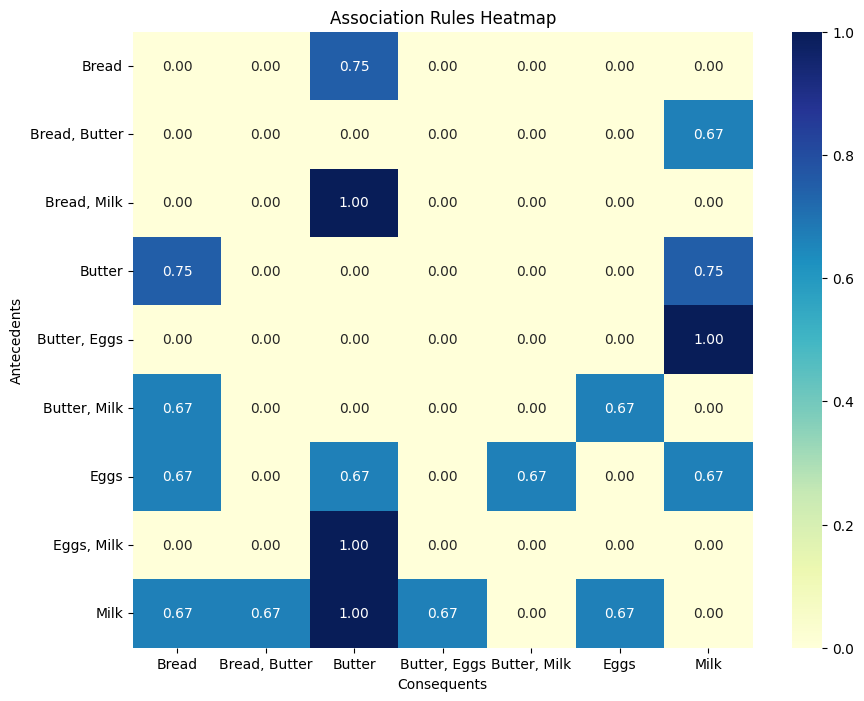

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules

# Load the dataset
grocery_df = pd.read_csv("grocery_dataset.csv")
grocery_df['Items'] = grocery_df['Items'].apply(eval)  # Convert strings back to lists

# Preprocess the data using one-hot encoding
mlb = MultiLabelBinarizer()
encoded_data = pd.DataFrame(
    mlb.fit_transform(grocery_df['Items']),
    columns=mlb.classes_,
    index=grocery_df.index
)

# Step 1: Apply FP-Growth to generate frequent itemsets
min_support = 0.4  # Set minimum support threshold
frequent_itemsets = fpgrowth(encoded_data, min_support=min_support, use_colnames=True)

# Step 2: Enhance with an Attention Mechanism
# Define an attention score based on frequency and item importance
frequent_itemsets['attention_score'] = frequent_itemsets['support'] * (
    frequent_itemsets['itemsets'].apply(lambda x: sum(len(item) for item in x))
)
frequent_itemsets = frequent_itemsets.sort_values(by='attention_score', ascending=False)

# Step 3: Generate Association Rules
min_confidence = 0.6  # Set minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence, num_itemsets=len(encoded_data))
#rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Step 4: Visualization
# Plot top 10 frequent itemsets by attention score
plt.figure(figsize=(10, 6))
top_itemsets = frequent_itemsets.head(10)
plt.barh(
    [', '.join(list(x)) for x in top_itemsets['itemsets']],
    top_itemsets['attention_score'],
    color='skyblue'
)
plt.xlabel('Attention Score')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets by Attention Score')
plt.gca().invert_yaxis()
plt.show()

# Heatmap of association rules
plt.figure(figsize=(10, 8))
confidence_matrix = pd.crosstab(
    rules['antecedents'].apply(lambda x: ', '.join(list(x))),
    rules['consequents'].apply(lambda x: ', '.join(list(x))),
    values=rules['confidence'],
    aggfunc='mean'
).fillna(0)
sns.heatmap(confidence_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Association Rules Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()
